# OBESITY RISK PREDICTION - MULTICLASS - CLASSIFICATION PROJECT

## GENERAL INTRODUCTION

Obesity is a significant health concern linked to cardiovascular disease. This project aims to develop a predictive model that identifies an individual's risk of obesity. The data consists of the estimation of obesity levels in people from the countries of Mexico, Peru, and Colombia, with ages between 14 and 61, and diverse eating habits and physical conditions. Data was collected using a web platform with a survey, then the information was processed obtaining 17 attributes and 20758 records.
Our target variable is Obesity risk (NObeyesdad). This is a categorical variable with several levels:

 0. Insufficient_Weight
 1. Normal
 2. Overweight_Level_I
 3. Overweight_Level_II
 4. Obesity_Type_I
 5. Obesity_Type_II
 6. Obesity_Type_III
 
This project can benefit various stakeholders:

 - Individuals: Understanding their obesity risk empowers individuals to make informed choices about their health, potentially preventing future complications.

 - Healthcare Providers: The model could be a valuable screening tool, allowing healthcare professionals to identify individuals at higher risk for obesity and CVD, enabling early intervention.

 - Public Health Initiatives: This model could inform public health programs aimed at promoting healthy weight management and reducing obesity rates in Mexico, Peru, and Colombia (target population).


Source:
The data is originally derived from the website Kaggle.com, which can be accessed from https://www.kaggle.com/competitions/playground-series-s4e2/data

## PROBLEM APPROACH

The type of the dataset and the problem is a classic supervised multiclass-classification. We want to build a machine learning model to predict obesity level. We start by inspecting and visualising the data, then clean and transform the data before building and testing 29 models, such as XGBoost, LightGBM, RandomForest. We evaluate the models using metrics like accuracy, cross_val_score to select 3 best models (RandomForest, XGBoost, LightGBM) and do hyperparameter tuning. Subsequently, we construct a Voting Classifier ensemble model using these 3 models. The performance of this ensemble model is then compared against its individual components to find the best final model. Finally, we make prediction and assess the performance of the final best tuned model.


## OUTLINE

I, DATA INSPECTION

1, Import Libraries and Dataset

2, General description

3, Visualization

II, DATA PREPROCESSING

1, Dealing with outliers

2, Feature Engineering

3, Feature Transformation (Scaling, Encoding)

   (Optional PCA)

III, TESTING MULTIPLE MODELS

1, Spliting the dataset

2, Building and testing 29 models

IV, Hyperparameter Tuning 3 GOOD MODELS

A-RandomForest

B-XGBoost

C-LightGBM

V, BUILDING A VOTINGCLASSIFIER ENSEMBLE MODEL AND TUNING

* Comparing against its 3 components (using Confusion Matrix, Classification Report, Accuracy, Cross_val_score)

VI, MAKING PREDICTION WITH THE BEST MODEL AND CONCLUSION


### I, DATA INSPECTION

##### 1, IMPORT LIBRARIES USED AND THE OBESITY DATASET

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tabulate import tabulate
from pandas.plotting import scatter_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split,cross_val_predict
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, OrdinalEncoder, RobustScaler, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,roc_curve, roc_auc_score, make_scorer, classification_report,confusion_matrix

In [2]:
df = pd.read_csv("train.csv")
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')
df = df.drop(columns = ["id"])
df.head()

The dataset has 20758 rows and 18 columns


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
data = [
    ["Age", "Years old"],
    ["Height", "Height (meter)"],
    ["Weight", "Weight (kilogram)"],
    ["FAVC", "Frequent consumption of high caloric food"],
    ["FCVC", "Frequency of consumption of vegetables (frequency)"],
    ["NCP", "Number of main meals (number)"],
    ["CAEC", "Consumption of food between meals"],
    ["CH20", "Consumption of water daily (liter)"],
    ["CALC", "Consumption of alcohol (frequency)"],
    ["SCC", "Calories consumption monitoring"],
    ["FAF", "Physical activity frequency (day/week)"],
    ["TUE", "Time using technology devices (hour/day)"],
    ["MTRANS", "Transportation used "]
]
headers = ["Abbreviation", "Full Form and Unit of Measurement"]
table = tabulate(data, headers, tablefmt="pipe")
print(table)


| Abbreviation   | Full Form and Unit of Measurement                  |
|:---------------|:---------------------------------------------------|
| Age            | Years old                                          |
| Height         | Height (meter)                                     |
| Weight         | Weight (kilogram)                                  |
| FAVC           | Frequent consumption of high caloric food          |
| FCVC           | Frequency of consumption of vegetables (frequency) |
| NCP            | Number of main meals (number)                      |
| CAEC           | Consumption of food between meals                  |
| CH20           | Consumption of water daily (liter)                 |
| CALC           | Consumption of alcohol (frequency)                 |
| SCC            | Calories consumption monitoring                    |
| FAF            | Physical activity frequency (day/week)             |
| TUE            | Time using technology devices (hour/day)     

##### 2, GENERAL DESCRIPTION

In [4]:
df.describe().round(2)

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00,20758.00,20758.00,20758.00,20758.00,20758.00,20758.00,20758.00
mean,23.84,1.70,87.89,2.45,2.76,2.03,0.98,0.62
std,5.69,0.09,26.38,0.53,0.71,0.61,0.84,0.60
min,14.00,1.45,39.00,1.00,1.00,1.00,0.00,0.00
25%,20.00,1.63,66.00,2.00,3.00,1.79,0.01,0.00
50%,22.82,1.70,84.06,2.39,3.00,2.00,1.00,0.57
75%,26.00,1.76,111.60,3.00,3.00,2.55,1.59,1.00
max,61.00,1.98,165.06,3.00,4.00,3.00,3.00,2.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          20758 non-null  object 
 1   Age                             20758 non-null  float64
 2   Height                          20758 non-null  float64
 3   Weight                          20758 non-null  float64
 4   family_history_with_overweight  20758 non-null  object 
 5   FAVC                            20758 non-null  object 
 6   FCVC                            20758 non-null  float64
 7   NCP                             20758 non-null  float64
 8   CAEC                            20758 non-null  object 
 9   SMOKE                           20758 non-null  object 
 10  CH2O                            20758 non-null  float64
 11  SCC                             20758 non-null  object 
 12  FAF                             

In [6]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
20753    False
20754    False
20755    False
20756    False
20757    False
Length: 20758, dtype: bool

In [7]:
df.nunique()

Gender                               2
Age                               1703
Height                            1833
Weight                            1979
family_history_with_overweight       2
FAVC                                 2
FCVC                               934
NCP                                689
CAEC                                 4
SMOKE                                2
CH2O                              1506
SCC                                  2
FAF                               1360
TUE                               1297
CALC                                 3
MTRANS                               5
NObeyesdad                           7
dtype: int64

In [8]:
def summary(df):
    smr = pd.DataFrame(df.dtypes, columns=['data type'])
    smr['#missing'] = df.isnull().sum().values
    smr['Duplicate'] = df.duplicated().sum()
    smr['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    smr['min'] = desc['min'].values
    smr['max'] = desc['max'].values
    smr['avg'] = desc['mean'].values
    smr['std dev'] = desc['std'].values
    smr['top value'] = desc['top'].values
    smr['Freq'] = desc['freq'].values

    return smr
summary(df).style.background_gradient()

,data type,#missing,Duplicate,#unique,min,max,avg,std dev,top value,Freq
Gender,object,0,0,2,nan,nan,nan,nan,Female,10422
Age,float64,0,0,1703,14.000000,61.000000,23.841804,5.688072,nan,nan
Height,float64,0,0,1833,1.450000,1.975663,1.700245,0.087312,nan,nan
Weight,float64,0,0,1979,39.000000,165.057269,87.887768,26.379443,nan,nan
family_history_with_overweight,object,0,0,2,nan,nan,nan,nan,yes,17014
FAVC,object,0,0,2,nan,nan,nan,nan,yes,18982
FCVC,float64,0,0,934,1.000000,3.000000,2.445908,0.533218,nan,nan
NCP,float64,0,0,689,1.000000,4.000000,2.761332,0.705375,nan,nan
CAEC,object,0,0,4,nan,nan,nan,nan,Sometimes,17529
SMOKE,object,0,0,2,nan,nan,nan,nan,no,20513


##### About Data:
- The dataset contains 20758 rows and 18 columns
- There are no missing or duplicate values in any of the columns
- Target Variable - Obesity Classification (NObeyesdad)

In [9]:
cor_matrix = df.corr().round(1)
cor_matrix

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Age,1.0,-0.0,0.3,0.0,-0.0,-0.0,-0.2,-0.3
Height,-0.0,1.0,0.4,-0.1,0.2,0.2,0.3,0.1
Weight,0.3,0.4,1.0,0.2,0.1,0.3,-0.1,-0.1
FCVC,0.0,-0.1,0.2,1.0,0.1,0.1,-0.1,-0.1
NCP,-0.0,0.2,0.1,0.1,1.0,0.1,0.1,0.1
CH2O,-0.0,0.2,0.3,0.1,0.1,1.0,0.1,-0.0
FAF,-0.2,0.3,-0.1,-0.1,0.1,0.1,1.0,0.0
TUE,-0.3,0.1,-0.1,-0.1,0.1,-0.0,0.0,1.0


<AxesSubplot:>

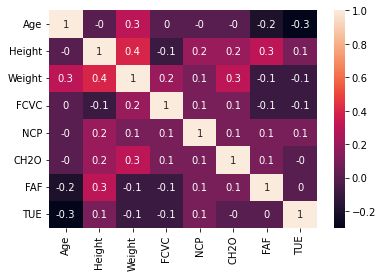

In [10]:
sns.heatmap(cor_matrix,annot = True)

No clear correlation between any of the numeric variables

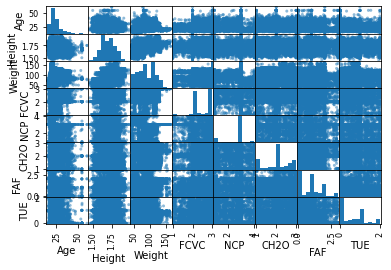

In [11]:
scatter_matrix(df)
plt.show()

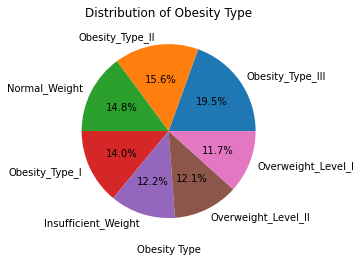

In [12]:
obesity_counts = df['NObeyesdad'].value_counts()
pie_chart_slice_labels = obesity_counts.index.to_numpy()
plt.pie(obesity_counts,labels = pie_chart_slice_labels,autopct = "%1.1f%%")
plt.xlabel("Obesity Type")
plt.title("Distribution of Obesity Type")
plt.show()

Target classes are almost equally distributed 

In [13]:
print('The highest number of people with',
      obesity_counts.sort_values(ascending=False).index[0],'having share of',round(max(obesity_counts)/sum(obesity_counts)*100,2),"%")
      

The highest number of people with Obesity_Type_III having share of 19.49 %


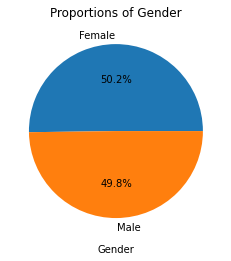

In [14]:
gender_counts = df['Gender'].value_counts()
gender_slice_labels = gender_counts.index.to_numpy()
plt.pie(gender_counts,labels = gender_slice_labels,autopct = "%1.1f%%")
plt.xlabel("Gender")
plt.title("Proportions of Gender")
plt.show()

Gender distribution is fairly equal in the dataset

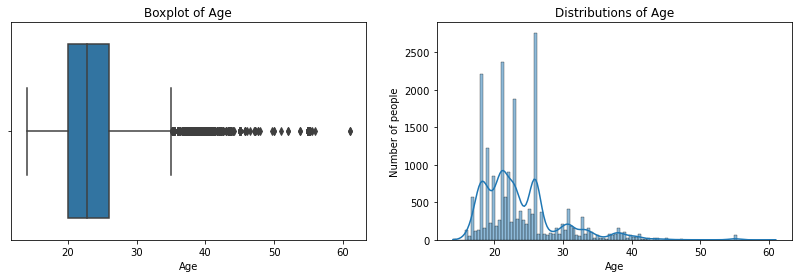

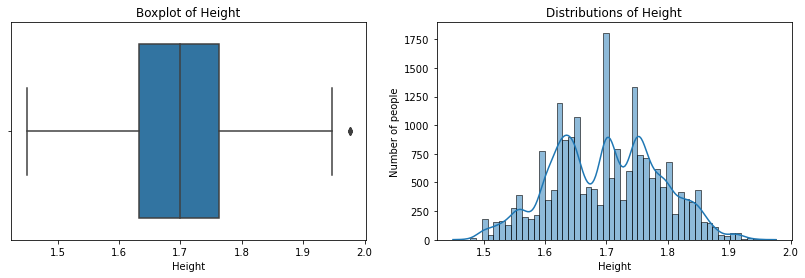

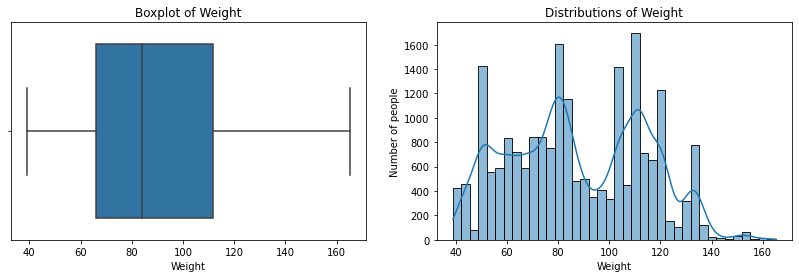

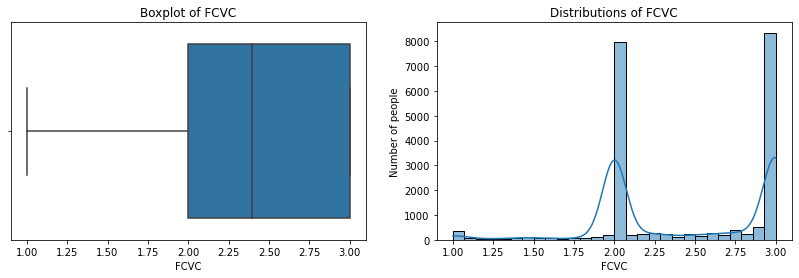

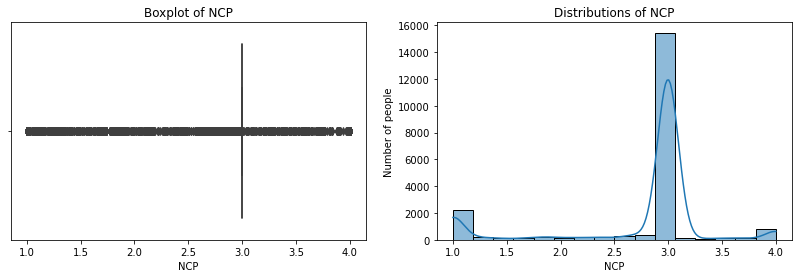

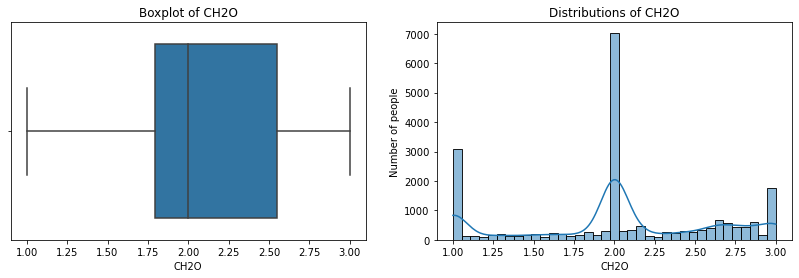

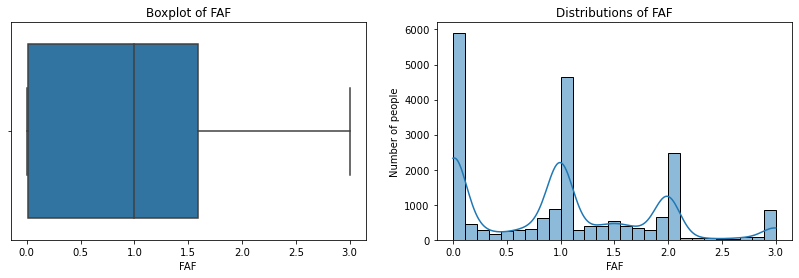

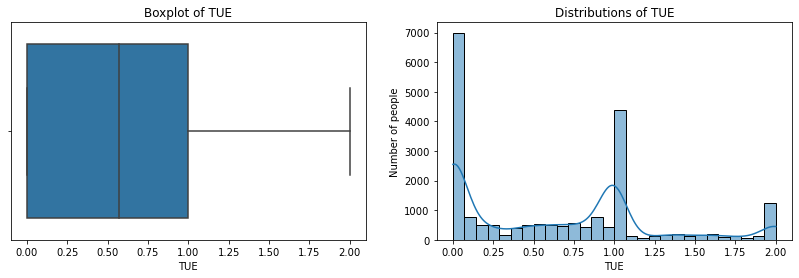

In [15]:
columns = df.columns
for col in columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        plt.figure(figsize=(14,4))
        plt.subplot(1,2,1)
        fig = sns.boxplot(data=df,x= col)
        fig.set_title(f"Boxplot of {col}")
        plt.subplot(1,2,2)
        fig = sns.histplot(df,x=col,kde = True)
        fig.set_ylabel("Number of people")
        fig.set_xlabel(col)
        fig.set_title(f"Distributions of "+col)
        plt.show()

##### Important Observations on Univariate Analysis of Numerical Variables
Age column has around half of the data in the range of 20-30 with lots of outliers at the right end. the distribution is highly skewed towards the right.

Height and Weight are somewhat(not entirely) normally distributed with very few outliers. Weight new features like obses and not obese.

NCP - Number of main meals - Majority of the people have 3 main meals with few people having either 1 or 4.

Consumption of water daily (CH20) - WHO recommends around 3 litres consumption and here in the data we have most of the people consumption around 2-2.5 litres.

Physical activity frequency (FAF) - Most people do little to no excercise as per the distribution on the boxplot.

Time using technology devices (TUE) - Most people spend little to no time as per the distribution on the boxplot.

In [16]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
outliers_count = ((df["Age"]<lower_bound) | (df["Age"]>upper_bound)).sum()
print("Number of outliers in the Age column",outliers_count, '~',round(outliers_count/len(df["Age"])*100,2),'%')

Number of outliers in the Age column 1074 ~ 5.17 %


### II, DATA PREPROCESSING

##### 1, DEALING WITH OUTLIERS
(3 different ways)

In [17]:
#Remove outliers
df1 = df[(df["Age"]>=lower_bound) & (df["Age"]<=upper_bound)]

In [18]:
#Replace outliers by median
from scipy.stats.mstats import winsorize
df2 = df.copy()
df2['Age']=winsorize(df2['Age'])

C:\Users\ngochuyen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


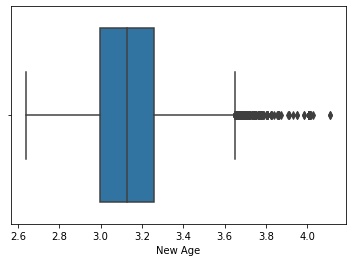

In [19]:
#Scale outliers by log transformation because the distribution of age is positively skewed
df3 = df.copy()
df3['New Age'] = [np.log(x) for x in df["Age"]]
df3 = df3.drop(columns = ["Age"])
sns.boxplot(df3["New Age"])
plt.show()

In [20]:
Q1 = df3['New Age'].quantile(0.25)
Q3 = df3['New Age'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
outliers_count = ((df3["New Age"]<lower_bound) | (df3["New Age"]>upper_bound)).sum()
print("Number of outliers in the Age column",outliers_count, '~',round(outliers_count/len(df3["New Age"])*100,2),'%')

Number of outliers in the Age column 566 ~ 2.73 %


In [21]:
df3 = df3[(df3["New Age"] >= lower_bound) & (df3["New Age"] <= upper_bound)]

In [22]:
# Create button
import ipywidgets as widgets
from IPython.display import display, clear_output
button = widgets.ToggleButtons(
 options=['Remove', 'Winsorize', 'Log Transform'],
 description='Choose: ',
 disabled=False
)
output = widgets.Output()
def handle_toggle(change):
    selected_option = change['new']
    global df
    if selected_option == 'Remove':
        df = df1  # Assign df to df1
    elif selected_option == 'Winsorize':
        df = df2  # Assign df to df2
    elif selected_option == 'Log Transform':
        df = df3
    with output:
        clear_output(wait=True)
        print("Selected Option:", button.value)
        print("DataFrame after operation:")
        display(df)
display(button)
button.observe(handle_toggle, names = 'value')
display(output)

ToggleButtons(description='Choose: ', options=('Remove', 'Winsorize', 'Log Transform'), value='Remove')

Output()

In [23]:
outlier_score = pd.DataFrame()
outlier_score['Model'] = ['Remove','Winsorize','Log Transform']
outlier_score['RandomForest'] = [0.900518, 0.900759, 0.901939]
outlier_score['XGBoost'] = [0.906660,0.906660,0.906643]
outlier_score['LGBM'] = [0.905035,0.905035,0.905839]
outlier_score.style.set_properties(subset=['RandomForest','XGBoost','LGBM'], **{'width': '200px'})

,Model,RandomForest,XGBoost,LGBM
0,Remove,0.900518,0.906660,0.905035
1,Winsorize,0.900759,0.906660,0.905035
2,Log Transform,0.901939,0.906643,0.905839


After trying these out, we found that the log transformation worked best

##### 2, FEATURE ENGINEERING
A Body Mass Index (BMI) column can be created from Height and Weight. BMI is the common feature used to assess obesity. Despite the high correlation (0.9) between BMI and Weight, suggestive of multicollinearity, both columns are retained. Dropping either Weight or BMI resulted in poorer performance of the final model. This decision was informed by experimentation.

In [24]:
df['BMI']=df['Weight']/np.square(df["Height"])

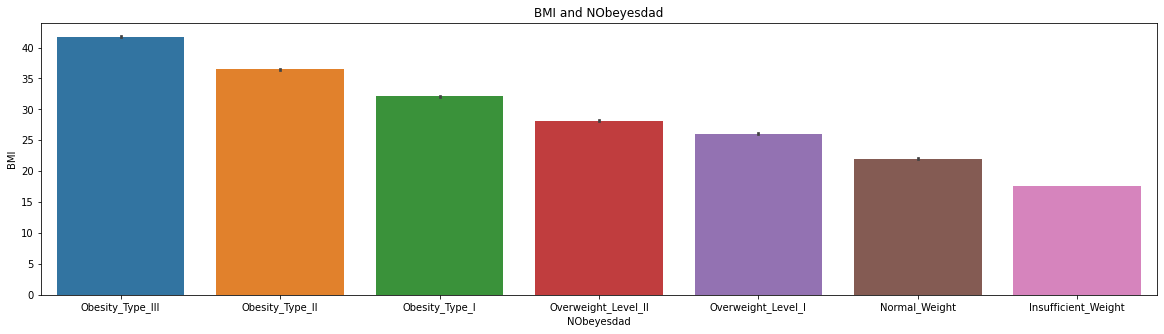

In [25]:
plt.figure(figsize = (20,5))
order = df.groupby("NObeyesdad")["BMI"].median().sort_values(ascending = False).index
fig = sns.barplot(x="NObeyesdad",y='BMI',data=df,order = order)
fig.set_title("BMI and NObeyesdad")
plt.show()

It can be clearly deduced from the above graph that the higher the BMI is, the higher the obesity level is.

<AxesSubplot:>

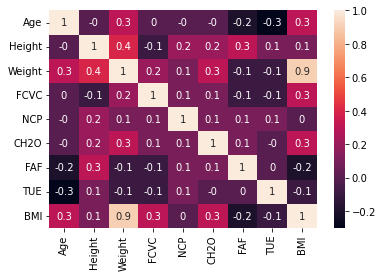

In [26]:
cor_matrix2 = df.corr().round(1)
sns.heatmap(cor_matrix2,annot = True)

In [27]:
bwh_score = pd.DataFrame()
bwh_score['Drop'] = ['Weight','BMI','No drop']
bwh_score['RandomForest'] = [0.892591, 0.898163, 0.901072]
bwh_score['XGBoost'] = [0.902001,0.903077,0.906643]
bwh_score['LGBM'] = [0.902000,0.90307,0.905529]
bwh_score.style.set_properties(subset=['RandomForest','XGBoost','LGBM'], **{'width': '200px'})

,Drop,RandomForest,XGBoost,LGBM
0,Weight,0.892591,0.902001,0.902000
1,BMI,0.898163,0.903077,0.903070
2,No drop,0.901072,0.906643,0.905529


##### 3, FEATURE TRANSFORMATION (SCALING, ENCODING)

In [28]:
#!pip install category_encoders

We use OrdinalEncoder for ordinal variables, and OneHotEncoding for nominal variables. All ordinal, nominal and numerical variables then are scaled by 3 different Scaler (StandardScaler, RobustScaler, PowerTransformer)

In [29]:
numerical = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]

In [30]:
ordinal = ["CAEC","CALC"]
nominal = ["Gender","family_history_with_overweight","FAVC","SMOKE","SCC","MTRANS"]

In [31]:
df=pd.get_dummies(df,columns = nominal)

In [32]:
from numpy import asarray
from category_encoders import OrdinalEncoder
maplist = [{'col':'CAEC','mapping':{'no':0,'Sometimes':1,'Frequently':2,'Always':3}},
               {'col':'CALC','mapping':{'no':0,'Sometimes':1,'Frequently':2,'Always':3}}]
encoder = OrdinalEncoder(mapping = maplist)
df[ordinal]=encoder.fit_transform(df[ordinal])

In [33]:
maplist = [{'col':'NObeyesdad','mapping':{'Obesity_Type_III':6,"Obesity_Type_II":5,"Obesity_Type_I":4,"Overweight_Level_II":3,"Overweight_Level_I":2,"Normal_Weight":1,"Insufficient_Weight":0}}]
encoder = OrdinalEncoder(mapping = maplist)
target = ['NObeyesdad']
df[target]=encoder.fit_transform(df[target])    

In [34]:
scaler1 = StandardScaler()
scaler2 = RobustScaler()
scaler3 = PowerTransformer()
scale = numerical+ordinal
df1_s = df.copy()
df2_s = df.copy()
df3_s = df.copy()
df1_s[scale]=scaler1.fit_transform(df1_s[scale])
df2_s[scale]=scaler2.fit_transform(df2_s[scale])
df3_s[scale]=scaler3.fit_transform(df3_s[scale])

In [35]:
#Button
button2 = widgets.ToggleButtons(
 options=['StandardScaler', 'RobustScaler', 'PowerTransformer'],
 description='Scaler: ',
 disabled=False
)
output = widgets.Output()
def handle_toggle2(change):
    selected_option = change['new']
    global scaler
    global df
    global scale
    if selected_option == 'StandardScaler':
        df=df1_s
    elif selected_option == 'RobustScaler':
        df=df2_s
    elif selected_option == 'PowerTransformer':
        df=df3_s
    with output:
        clear_output(wait=True)
        print("Selected Option:", button2.value)
        print("DataFrame after operation:")
        display(df)
display(button2)
button2.observe(handle_toggle2, names = 'value')
display(output)

ToggleButtons(description='Scaler: ', options=('StandardScaler', 'RobustScaler', 'PowerTransformer'), value='S…

Output()

In [43]:
scale_score = pd.DataFrame()
scale_score['Scaler'] = ['PowerTransformer','RobustScaler','StandardScaler']
scale_score['RandomForest'] = [0.901000, 0.901877, 0.901939]
scale_score['XGBoost'] = [0.905637,0.906643,0.906643]
scale_score['LGBM'] = [0.905877,0.905158,0.905529]
scale_score.style.set_properties(subset=['RandomForest','XGBoost','LGBM'], **{'width': '200px'})

,Scaler,RandomForest,XGBoost,LGBM
0,PowerTransformer,0.901000,0.905637,0.905877
1,RobustScaler,0.901877,0.906643,0.905158
2,StandardScaler,0.901072,0.906643,0.905839


The models’ performance score differences between the scaling methods are relatively small for each model (all within 0.001 for most models). This suggests that the models might not be highly sensitive to the specific scaling technique used in this case.

For the final run, we chose StandardScaler for this modeling task based on achieving good performance and its efficient computation compared to the 2 others.

## OPTIONAL PCA



Loadings Matrix:
[[-1.81315271e-01 -5.46730886e-01 -1.87556691e-01  4.23158759e-02
   2.41822992e-01 -2.46671634e-01  1.20725564e-01  1.00657795e-01
  -1.73967929e-01 -3.64992042e-01 -5.36595486e-01  2.13852504e-02
  -2.13852504e-02  1.23655861e-01 -1.23655861e-01  3.67523110e-02
  -3.67523110e-02  2.29689344e-03 -2.29689344e-03 -2.01302974e-02
   2.01302974e-02 -2.29075100e-02  3.39504954e-04  4.19131200e-04
   1.21476040e-02  1.00012699e-02]
 [ 6.11866307e-01  1.29118773e-01 -2.50316526e-01  2.61812024e-01
   1.83119158e-02  1.85533090e-01  4.95653809e-01  1.86450449e-01
  -1.86238724e-02 -1.76164482e-01 -7.29183856e-02 -2.47511376e-01
   2.47511376e-01 -3.39681774e-02  3.39681774e-02 -1.19338249e-02
   1.19338249e-02 -3.35823954e-03  3.35823954e-03  5.27396427e-03
  -5.27396427e-03  8.65863622e-03  4.77577623e-04  1.39156428e-04
  -2.10570343e-02  1.17816640e-02]
 [-5.83154838e-02  3.82720541e-02  5.46801319e-01  5.47642326e-01
   3.54760544e-01  1.70415757e-01  1.36875055e-03  1.9

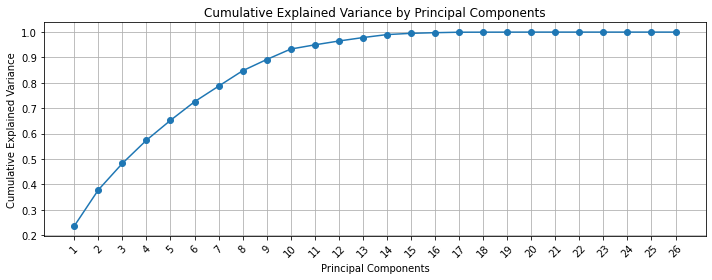

In [44]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load data from CSV file (replace 'your_data.csv' with your actual file path)
dfpca = df.drop(columns = 'NObeyesdad')
# Store feature names (assuming they exist in the DataFrame's columns)
feature_names = list(dfpca.columns)  # Get column names as a list

# Perform PCA (optional: specify the number of components)
pca = PCA()
pca.fit(dfpca)

# Extract explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Calculate cumulative variance
cumulative_variance = []
total = 0
for var in explained_variance:
  total += var
  cumulative_variance.append(total)

# Generate the plot for cumulative explained variance
plt.figure(figsize=(10, 4))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.grid(True)
plt.xticks(range(1, len(explained_variance) + 1))
plt.xticks(rotation=45)
plt.tight_layout()

# Access the loadings matrix
loadings = pca.components_

# Analyze variable contributions to principal components
print("\nLoadings Matrix:")
print(loadings)  # Shows the weights (loadings) for each variable in each component

# Interpretation example (assuming you have meaningful feature names)
print("\nInterpretation of Loadings (example):")
for i in range(len(loadings)):
  # Find features with high absolute loadings (replace 0.5 with a suitable threshold)
  important_features = [feature_names[j] for j in range(len(loadings[i])) if abs(loadings[i][j]) > 0.5]
  if important_features:
    print(f"Principal Component {i+1}: Important Features - {important_features}")
plt.show()

In [45]:
pca_variance = PCA(n_components = 0.99)
X_variance = pca_variance.fit_transform(dfpca)
print(X_variance.shape)

(20192, 14)


In [65]:
pca_score = pd.DataFrame()
pca_score['PCA?'] = ['Yes','NO']
pca_score['Cross Validation Score'] = [0.853589, 0.911658]
pca_score['Accuracy'] = [0.856647,0.913840]
pca_score.style.set_properties(subset=['Cross Validation Score','Accuracy'], **{'width': '200px'})

,PCA?,Cross Validation Score,Accuracy
0,Yes,0.853589,0.856647
1,NO,0.909801,0.912602


### III, TESTING MULTIPLE MODELS

##### 1, SPLITING THE DATASET INTO TRAIN AND TEST SET
In this case, we want to split it into the train and test set with the ratio 0.8:0.2, respectively with random_state = 42 to ensure the result is unchanged after many trials.

In [47]:
X = df.drop(columns ='NObeyesdad')
y = df['NObeyesdad']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

##### 2, BUILDING AND TESTING MODELS
To avoid overfitting, we split the dataset into many different folds for training and testing

In [48]:
!pip install lightgbm

In [74]:
!pip install xgboost

In [49]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier,RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier,NearestCentroid
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from xgboost import XGBClassifier
from sklearn.semi_supervised import LabelPropagation
from sklearn.dummy import DummyClassifier

EVALUATING 29 MODELS BY ACCURACY, F1 SCORE, TIME TAKEN

In [51]:
!pip install lazypredict

In [52]:

from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models_lazy,predictions_lazy = clf.fit(X_train, X_test, y_train, y_test)
model_dictionary = clf.provide_models(X_train,X_test,y_train,y_test)


 97%|███████████████████████████████████████████████████████████████████████████████▏  | 28/29 [02:27<00:02,  2.02s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001554 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 16153, number of used features: 26
[LightGBM] [Info] Start training from score -2.094977
[LightGBM] [Info] Start training from score -1.878293
[LightGBM] [Info] Start training from score -2.139200
[LightGBM] [Info] Start training from score -2.121482
[LightGBM] [Info] Start training from score -2.066219
[LightGBM] [Info] Start training from score -1.846405
[LightGBM] [Info] Start training from score -1.599459


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [02:29<00:00,  5.14s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.91,0.90,None,0.91,1.57
XGBClassifier,0.90,0.89,None,0.90,1.00
RandomForestClassifier,0.90,0.89,None,0.90,1.95
ExtraTreesClassifier,0.89,0.88,None,0.89,1.51
BaggingClassifier,0.89,0.87,None,0.89,0.79
LogisticRegression,0.87,0.85,None,0.87,0.79
SVC,0.87,0.85,None,0.87,7.12
DecisionTreeClassifier,0.85,0.83,None,0.85,0.23
LinearDiscriminantAnalysis,0.84,0.82,None,0.84,0.18


In [89]:
models_lazy.iloc[:,[0,1,3,4]]

,Accuracy,Balanced Accuracy,F1 Score,Time Taken
Model,,,,
LGBMClassifier,0.91,0.90,0.91,1.57
XGBClassifier,0.90,0.89,0.90,1.00
RandomForestClassifier,0.90,0.89,0.90,1.95
ExtraTreesClassifier,0.89,0.88,0.89,1.51
BaggingClassifier,0.89,0.87,0.89,0.79
LogisticRegression,0.87,0.85,0.87,0.79
SVC,0.87,0.85,0.87,7.12
DecisionTreeClassifier,0.85,0.83,0.85,0.23
LinearDiscriminantAnalysis,0.84,0.82,0.84,0.18


In [53]:
#Prepare the configuration to run the test
seed = 7
results = []
names = []
models = []

In [54]:
models.append(('LR',LogisticRegression(solver = 'liblinear',multi_class='ovr')))
models.append(('CARD',DecisionTreeClassifier()))
models.append(('RFC',RandomForestClassifier()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(probability = True)))
models.append(('XGBoost',XGBClassifier()))
models.append(('LGBM',LGBMClassifier()))
models.append(('ada',AdaBoostClassifier()))
models.append(('extra',ExtraTreesClassifier()))
models.append(('QDA',QuadraticDiscriminantAnalysis()))
models.append(('bagging',BaggingClassifier()))
models.append(('nc',NearestCentroid()))
models.append(('sgd',SGDClassifier()))
models.append(('label',LabelPropagation()))
models.append(('ridge',RidgeClassifier()))
models.append(('dummy', DummyClassifier()))
models.append(('bernoulli',BernoulliNB()))

EVALUATING 19 MODELS BY CROSS_VAL_SCORE

In [56]:
scores = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10,random_state=seed,shuffle = True)
    model.fit(X_train,y_train)
    cv_results = model_selection.cross_val_score(model,X_train,y_train,cv=kfold,scoring = 'accuracy')
    scores.append(cv_results.mean())
    if name == 'XGBoost':
        names.append("XGBoostClassifier()")
    else:
        names.append(model)
df_results = pd.DataFrame()
df_results['name']=names
df_results['score']=scores

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001407 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2280
[LightGBM] [Info] Number of data points in the train set: 16153, number of used features: 26
[LightGBM] [Info] Start training from score -2.094977
[LightGBM] [Info] Start training from score -1.878293
[LightGBM] [Info] Start training from score -2.139200
[LightGBM] [Info] Start training from score -2.121482
[LightGBM] [Info] Start training from score -2.066219
[LightGBM] [Info] Start training from score -1.846405
[LightGBM] [Info] Start training from score -1.599459
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001103 seconds.
You c

In [57]:
df_results.style.set_properties(subset=['name'], **{'width': '400px'}).background_gradient()

,name,score
0,"LogisticRegression(multi_class='ovr', solver='liblinear')",0.762398
1,DecisionTreeClassifier(),0.843560
2,RandomForestClassifier(),0.901939
3,KNeighborsClassifier(),0.784313
4,LinearDiscriminantAnalysis(),0.832911
5,GaussianNB(),0.666377
6,SVC(probability=True),0.880148
7,XGBoostClassifier(),0.906643
8,LGBMClassifier(),0.905529
9,AdaBoostClassifier(),0.605964


It looks like that the most 3 performant algorithms are RandomForest, XGBoost, and LightGBM.

### IV, HYPERPARAMETER TUNING 3 GOOD MODELS

##### A, RANDOM FOREST

In [58]:
rf = RandomForestClassifier()
param_grid1 = {
    'bootstrap':[True, False],
     'n_estimators': [10, 100],
     'max_depth': [10, 20],
     'criterion': ['gini', 'entropy'],
     'min_samples_leaf': [1,3]
}
grid_search1 = GridSearchCV(
    rf, param_grid1, cv=3,n_jobs=-1)
grid_search1.fit(X_train, y_train)
print("Best hyperparameters:", grid_search1.best_params_)
print("The best score for this model is",grid_search1.best_score_)
best_rf_grid = grid_search1.best_estimator_
test_accuracy = best_rf_grid.score(X_test, y_test)
print("Test accuracy:", test_accuracy)

Best hyperparameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 100}
The best score for this model is 0.9003902342785323
Test accuracy: 0.9017083436494182


In [59]:
random_search1 = RandomizedSearchCV(
    rf, param_grid1, cv=3,n_jobs=-1)
random_search1.fit(X_train, y_train)
print("Best hyperparameters:", random_search1.best_params_)
print("The best score for this model is",random_search1.best_score_)
best_rf_random = random_search1.best_estimator_
test_accuracy = best_rf_random.score(X_test, y_test)
print("Test accuracy:", test_accuracy)

Best hyperparameters: {'n_estimators': 100, 'min_samples_leaf': 3, 'max_depth': 20, 'criterion': 'gini', 'bootstrap': False}
The best score for this model is 0.8995854838642919
Test accuracy: 0.9034414459024511


In [90]:
from ipywidgets import interact
rf_df = pd.DataFrame()
rf1 = RandomForestClassifier()
param_grid11 = {
    'bootstrap':[False],
    'criterion':['gini'],
     'n_estimators': [1,5,10,15,20,25,50,75,100],
     'max_depth': [5,10,15,20],
     'min_samples_leaf': [1,2,3,4,5]
}
grid_search11 = GridSearchCV(
    rf, param_grid11, cv=3,n_jobs=-1)
grid_search11.fit(X_train, y_train)
new_row = pd.DataFrame(grid_search11.cv_results_)
rf_df = rf_df.append(new_row, ignore_index=True)
rfdf = rf_df.iloc[:, [4,5,6,7,8,13]]
def interactive_plot(max_depth, min_samples_leaf):
    filtered_df = rfdf[(rfdf['param_max_depth'] == max_depth) & (rfdf['param_min_samples_leaf'] == min_samples_leaf)]
    x = filtered_df['param_n_estimators'].values
    y = filtered_df['mean_test_score'].values
    plt.figure(figsize=(8, 4))
    plt.plot(x, y)
    plt.xlabel('n_estimators')
    plt.ylabel('test_score')
    plt.title('Interactive Hyperparaeter Tuning')
    plt.grid(True)
    plt.show()

 
interact(interactive_plot, max_depth=(5,20,5), min_samples_leaf=(1, 5, 1))

interactive(children=(IntSlider(value=10, description='max_depth', max=20, min=5, step=5), IntSlider(value=3, …

<function __main__.interactive_plot(max_depth, min_samples_leaf)>

##### B, XGBOOST

In [60]:
xgb = XGBClassifier()
param_grid2 = {'colsample_bytree': [0.8,1],
               'learning_rate': [0.1,0.01],
               'max_depth': [1,3],
               'n_estimators': [300],
               'subsample': [0.8,1]
}
grid_search2 = GridSearchCV(
    xgb, param_grid2, cv=3,n_jobs=-1)
grid_search2.fit(X_train, y_train)
print("Best hyperparameters:", grid_search2.best_params_)
print("The best score for this model is",grid_search2.best_score_)
best_xgb_grid = grid_search2.best_estimator_
test_accuracy = best_xgb_grid.score(X_test, y_test)
print("Test accuracy:", test_accuracy)

Best hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
The best score for this model is 0.908376297964141
Test accuracy: 0.9096310968061402


In [61]:
random_search2 = RandomizedSearchCV(
    xgb, param_grid2, cv=3,n_jobs=-1)
random_search2.fit(X_train, y_train)
print("Best hyperparameters:", random_search2.best_params_)
print("The best score for this model is",random_search2.best_score_)
best_xgb_random = random_search2.best_estimator_
test_accuracy = best_xgb_random.score(X_test, y_test)
print("Test accuracy:", test_accuracy)

Best hyperparameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 1}
The best score for this model is 0.9076335398670844
Test accuracy: 0.9101262688784353


##### C, LightGBM

In [63]:
lgbm = LGBMClassifier()
param_grid3 = {
    "objective": ["multiclass"],
         "metric": ["multi_logloss"],
         "verbosity": [-1],
         "boosting_type": ["gbdt"],
         "random_state": [42],
         "num_class": [7],
         "learning_rate": [0.01, 0.03],
         "n_estimators":[591],
         "lambda_l1": [0.01, 0.012],
         "max_depth": [5, 10],
         "colsample_bytree": [0.3, 0.4],
         "min_child_samples": [20, 25]
}
#model
grid_search3 = GridSearchCV(
    lgbm, param_grid3, cv=3,n_jobs=-1)
grid_search3.fit(X_train, y_train)
print("Best hyperparameters:", grid_search3.best_params_)
print("The best score for this model is",grid_search3.best_score_)
best_lgbm_grid = grid_search3.best_estimator_
test_accuracy = best_lgbm_grid.score(X_test, y_test)
print("Test accuracy:", test_accuracy)

Best hyperparameters: {'boosting_type': 'gbdt', 'colsample_bytree': 0.3, 'lambda_l1': 0.012, 'learning_rate': 0.03, 'max_depth': 5, 'metric': 'multi_logloss', 'min_child_samples': 25, 'n_estimators': 591, 'num_class': 7, 'objective': 'multiclass', 'random_state': 42, 'verbosity': -1}
The best score for this model is 0.909057385662575
Test accuracy: 0.9111166130230255


In [64]:
random_search3 = RandomizedSearchCV(lgbm, param_distributions=param_grid3, 
                                   n_iter=50, 
                                   cv=3, 
                                   verbose=2, 
                                   random_state=42, 
                                   n_jobs=-1)
random_search3.fit(X_train, y_train)
print("Best hyperparameters:", random_search3.best_params_)
print("The best score for this model is",random_search3.best_score_)
best_lgbm_random = random_search3.best_estimator_
test_accuracy = best_lgbm_random.score(X_test, y_test)
print("Test accuracy:", test_accuracy)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best hyperparameters: {'verbosity': -1, 'random_state': 42, 'objective': 'multiclass', 'num_class': 7, 'n_estimators': 591, 'min_child_samples': 25, 'metric': 'multi_logloss', 'max_depth': 5, 'learning_rate': 0.03, 'lambda_l1': 0.012, 'colsample_bytree': 0.3, 'boosting_type': 'gbdt'}
The best score for this model is 0.909057385662575
Test accuracy: 0.9111166130230255


### V, BUILDING A VOTINGCLASSIFIER ENSEMBLE MODEL AND TUNING

In [66]:
estimators = [("RF",best_rf_random),("XGBoost",best_xgb_random),("LGBM",best_lgbm_grid)]
ensemble_clf = VotingClassifier(estimators)
cv_results = model_selection.cross_val_score(ensemble_clf,X_train,y_train,cv=kfold,scoring = "accuracy")
ensemble_clf.fit(X_train,y_train)
y_pred = ensemble_clf.predict(X_test)

In [67]:
print(cv_results.mean(),accuracy_score(y_test,y_pred))

0.911658377525059 0.9138400594206487


In [68]:
param_grid4 = {'voting':['soft','hard'],'weights':[(1,1,1),(1,1,2)]}
grid_search4 = GridSearchCV(
    ensemble_clf, param_grid4, cv=3, n_jobs=-1)
grid_search4.fit(X_train, y_train)
print("Best hyperparameters:", grid_search4.best_params_)
print("The best score for this model is",grid_search4.best_score_)
best_ensemble_grid = grid_search4.best_estimator_
test_accuracy = best_ensemble_grid.score(X_test,y_test)
print("Test accuracy:", test_accuracy)

Best hyperparameters: {'voting': 'soft', 'weights': (1, 1, 1)}
The best score for this model is 0.9093050100185655
Test accuracy: 0.9121069571676157


In [69]:
random_search4 = RandomizedSearchCV(
    ensemble_clf, param_grid4, cv=3,n_jobs=-1)
random_search4.fit(X_train, y_train)
print("Best hyperparameters:", random_search4.best_params_)
print("The best score for this model is",random_search4.best_score_)
best_ensemble_clf_random = random_search4.best_estimator_
test_accuracy = best_ensemble_clf_random.score(X_test, y_test)
print("Test accuracy:", test_accuracy)

Best hyperparameters: {'weights': (1, 1, 1), 'voting': 'soft'}
The best score for this model is 0.9091812553260276
Test accuracy: 0.9123545432037633


After hyperparameter tuning for VotingClassifier, the performance on the train set does not increase. While it takes so long time and a lot computational resources, we opt to use default hyperparameters.

Text(0.5, 1.0, 'Confusion Matrix 1')

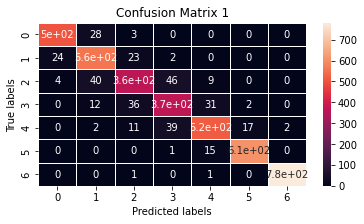

In [70]:
ensemble_clf.fit(X_train,y_train)
y_pred1 = ensemble_clf.predict(X_test)
cm1 = confusion_matrix(y_test,y_pred1)
fig, ax= plt.subplots(figsize=(6,3))
sns.heatmap(cm1, annot=True, ax = ax,linewidths=.5); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix 1') 

In [71]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       532
           1       0.87      0.92      0.89       605
           2       0.83      0.79      0.81       463
           3       0.81      0.82      0.81       448
           4       0.90      0.88      0.89       586
           5       0.97      0.97      0.97       622
           6       1.00      1.00      1.00       783

    accuracy                           0.91      4039
   macro avg       0.90      0.90      0.90      4039
weighted avg       0.91      0.91      0.91      4039



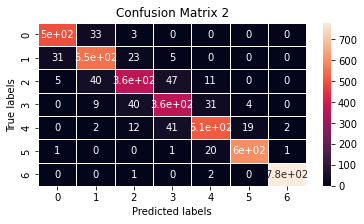

In [72]:
xgb = XGBClassifier(random_search2.best_params_)
xgb.fit(X_train,y_train)
y_pred2 = xgb.predict(X_test)
cm2 = confusion_matrix(y_test,y_pred2)
fig, ax= plt.subplots(figsize=(6,3))
sns.heatmap(cm2, annot=True, ax = ax,linewidths=.5); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix 2'); 

In [73]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       532
           1       0.87      0.90      0.88       605
           2       0.82      0.78      0.80       463
           3       0.79      0.81      0.80       448
           4       0.89      0.87      0.88       586
           5       0.96      0.96      0.96       622
           6       1.00      1.00      1.00       783

    accuracy                           0.90      4039
   macro avg       0.89      0.89      0.89      4039
weighted avg       0.90      0.90      0.90      4039



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2280
[LightGBM] [Info] Number of data points in the train set: 16153, number of used features: 26
[LightGBM] [Info] Start training from score -2.094977
[LightGBM] [Info] Start training from score -1.878293
[LightGBM] [Info] Start training from score -2.139200
[LightGBM] [Info] Start training from score -2.121482
[LightGBM] [Info] Start training from score -2.066219
[LightGBM] [Info] Start training from score -1.846405
[LightGBM] [Info] Start training from score -1.599459


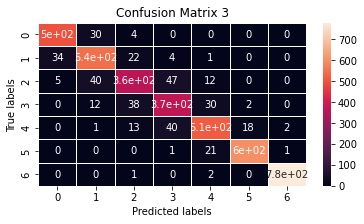

In [74]:
lgbm = LGBMClassifier()
lgbm.fit(X_train,y_train)
y_pred3 = lgbm.predict(X_test)
cm3 = confusion_matrix(y_test,y_pred3)
fig, ax= plt.subplots(figsize=(6,3))
sns.heatmap(cm3, annot=True, ax = ax,linewidths=.5); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix 3'); 

In [75]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       532
           1       0.87      0.90      0.88       605
           2       0.82      0.78      0.80       463
           3       0.80      0.82      0.81       448
           4       0.89      0.87      0.88       586
           5       0.97      0.96      0.97       622
           6       1.00      1.00      1.00       783

    accuracy                           0.91      4039
   macro avg       0.90      0.89      0.89      4039
weighted avg       0.91      0.91      0.91      4039



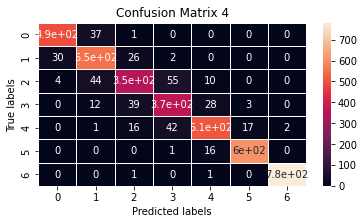

In [85]:
best_rf_grid.fit(X_train,y_train)
y_pred4 = best_rf_grid.predict(X_test)
cm4 = confusion_matrix(y_test,y_pred4)
fig, ax= plt.subplots(figsize=(6,3))
sns.heatmap(cm4, annot=True, ax = ax,linewidths=.5); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix 4'); 

In [77]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       532
           1       0.85      0.90      0.88       605
           2       0.82      0.76      0.78       463
           3       0.79      0.83      0.81       448
           4       0.90      0.87      0.88       586
           5       0.97      0.97      0.97       622
           6       1.00      1.00      1.00       783

    accuracy                           0.90      4039
   macro avg       0.89      0.89      0.89      4039
weighted avg       0.90      0.90      0.90      4039



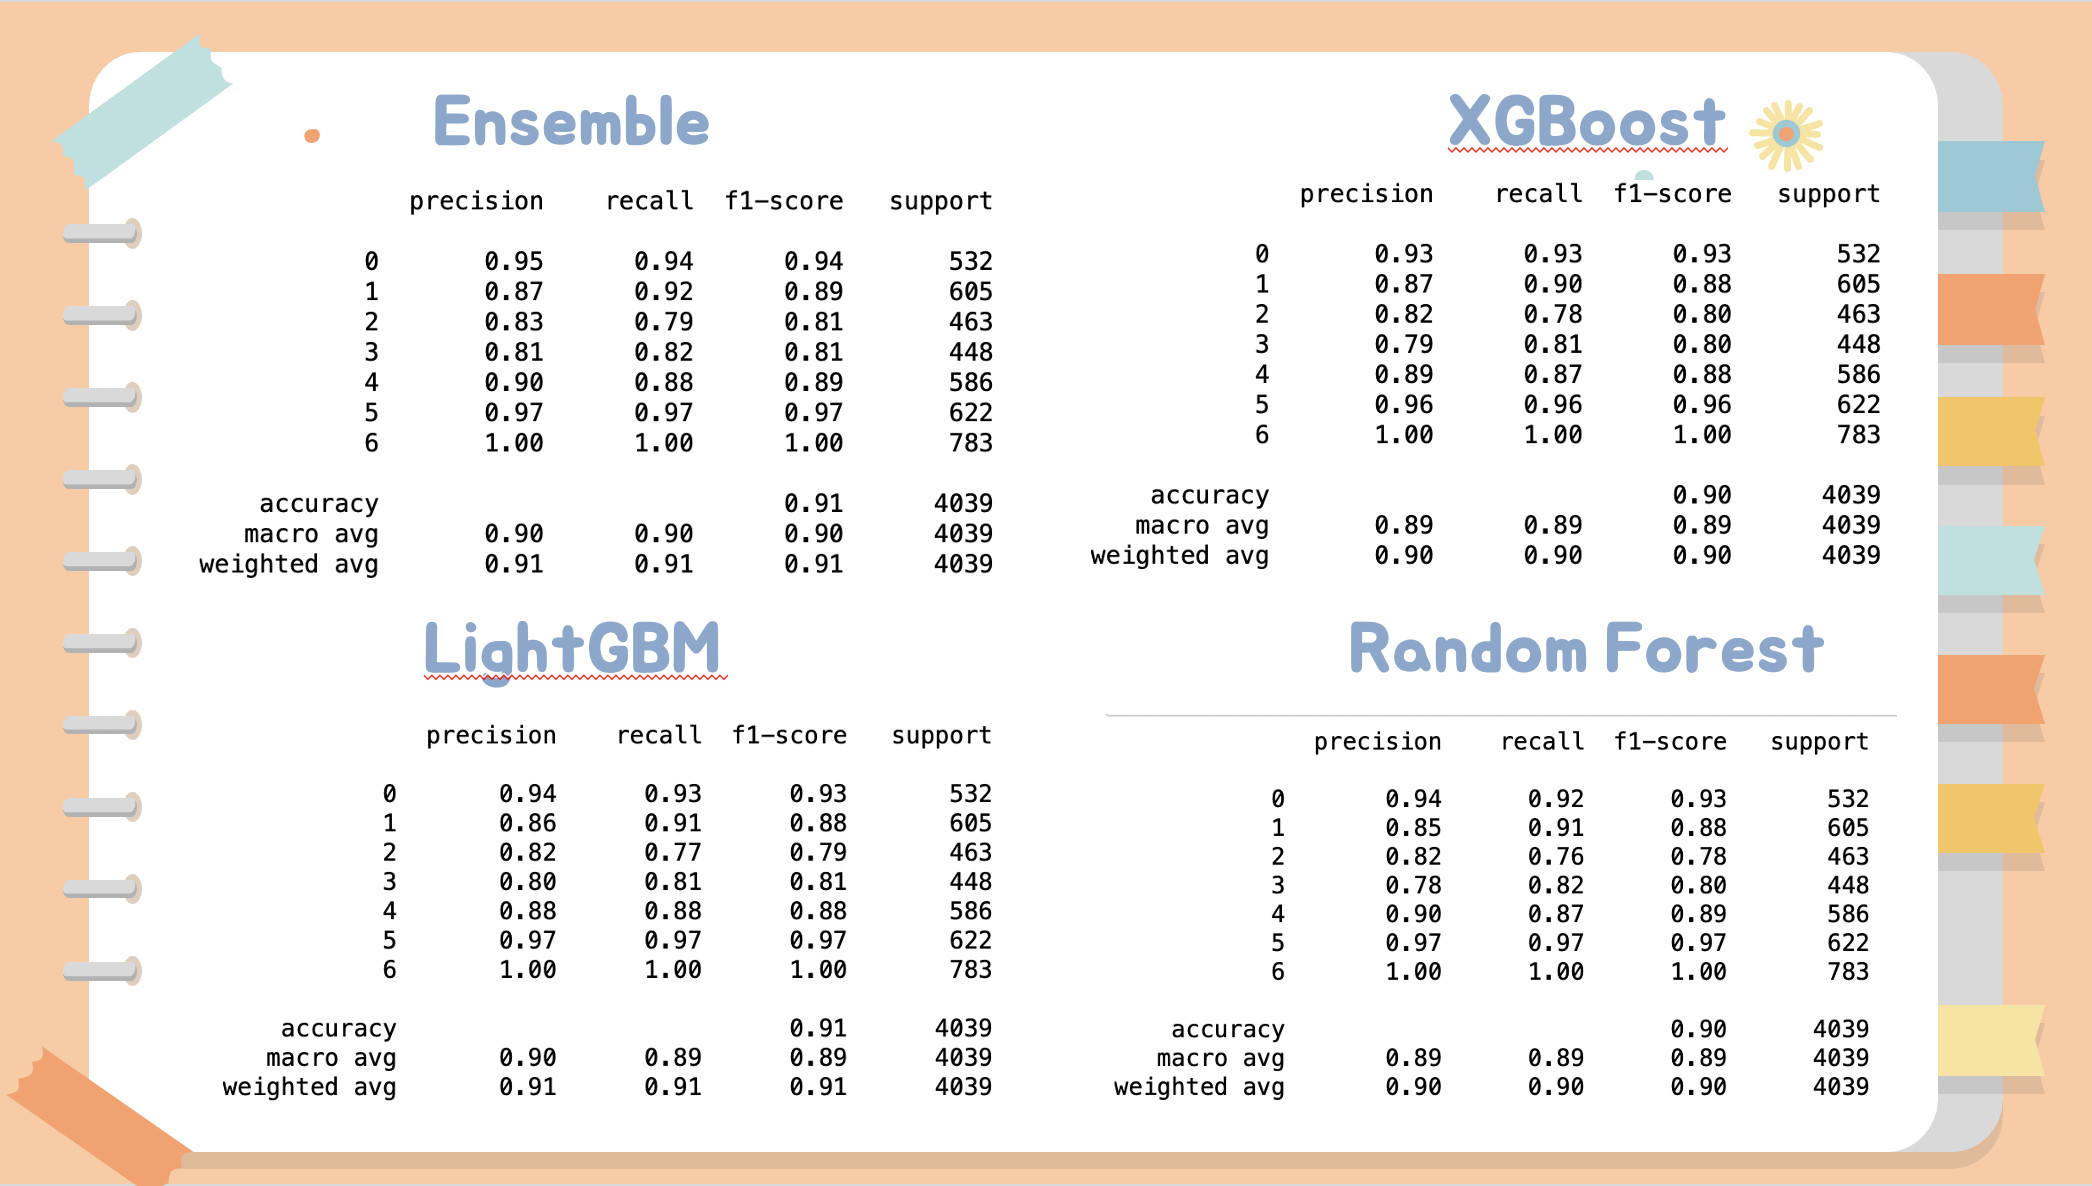

The best final model is VotingClassifier()

### VI, MAKING PREDICTION AND CONCLUSION

##### 1, APPLYING THE BEST PARAMETER TO THE BEST MODEL AND TRAIN WITH THE WHOLE DATASET

In [78]:
ensemble_clf.fit(X,y)

VotingClassifier(estimators=[('RF',
                              RandomForestClassifier(bootstrap=False,
                                                     max_depth=20,
                                                     min_samples_leaf=3)),
                             ('XGBoost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=1, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=Non...
                                            monotone_constraints=None,
            

##### 2, MAKING PREDICTION WITH NEW DATA

In [79]:
record1 = [-1.63633453, -1.16268236, -0.84144022,  0.33406434,  1.87727035, -0.05888807,
  0.01257979,  0.61519605, -1.65583025, -1.24701142, -0.80585245,  1.,
  0.,          0.,          1.,          0.,          1.,          1.,
  0.,          1.,          0.,          1.,          0.,          0.,
  0.,          0.        ]

In [80]:
record1_2d = np.array([record1])

# Predict the class label for the record
prediction = ensemble_clf.predict(record1_2d)

# Print the predicted class label
print("Predicted class label:", prediction)

Predicted class label: [0]


#### CONCLUSION

After optimizing the parameters of the VotingClassifier model, we were able to achieve an accuracy score of around 91.38%. However, it's important to note that the process of training a machine learning model to solve a problem is an iterative process that involves testing, failing, and improving the model until it achieves the desired performance. And according to our knowledge in Data Science subject until now, this is the best model achieved.


### ACKNOWLEDGEMENT

During project, there are a lot of things we were not clear about or having trouble dealing with machine learning techniques. Therefore, we want to express a huge gratefulness to listed but not limited sources that contribute to our success:

1) https://chat.openai.com/chat

2) https://scikit-learn.org

3) https://www.kaggle.com/

4) https://www.youtube.com/watch?v=1g9I5C2Dap0
